## Clustering with K-Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import pairwise_distances

In [46]:
# Generate synthetic data with four clusters
X, z = make_blobs(
    n_samples=1000, n_features=2, centers=4,
    random_state=42
)

In [45]:
X.shape

(1000, 2)

Text(0.5, 1.0, 'Clusters')

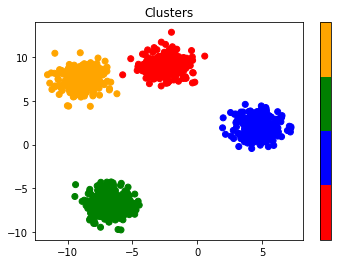

In [47]:
fig, ax = plt.subplots()
cmap = ListedColormap(['red', 'blue', 'green', 'orange'])
# cmap = ListedColormap(['red', 'blue', 'green', 'orange', "black"])

scatter = ax.scatter(X[:, 0], X[:, 1], c=z, cmap=cmap)

# Add a colorbar to show the correspondence between colors and clusters
colorbar = plt.colorbar(scatter)
colorbar.set_ticks([])

ax.set_title('Clusters')

In [19]:
# SSE scores
sse_scores = []

# Perform k-means clustering for k values from 2 to 8
k_values = range(2, 9)

for k in k_values:

    # Fit the k-means model
    kmeans = KMeans(
        n_clusters=k,
        n_init='auto',
        random_state=42
    )

    kmeans.fit(X)
    
    # Compute SSE (inertia)
    sse = kmeans.inertia_
    sse_scores.append(sse)

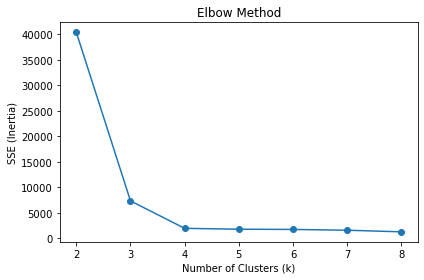

In [20]:
# Plot SSE and silhouette scores
fig, ax = plt.subplots()

# Plot SSE
ax.plot(k_values, sse_scores, marker='o')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('SSE (Inertia)')
ax.set_title('Elbow Method')

plt.tight_layout()


In [38]:
k = 4

# Fit the k-means model
kmeans = KMeans(
    n_clusters=k,
    n_init='auto',
    random_state=42
)
kmeans.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [39]:
y = kmeans.predict(X)

In [40]:
np.unique(y)

array([0, 1, 2, 3], dtype=int32)

Text(0.5, 1.0, 'Clusters')

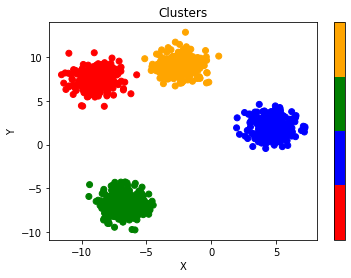

In [41]:
fig, ax = plt.subplots()
# Define a colormap with the same number of colors as clusters
# cmap = ListedColormap(['red', 'blue', 'green'])
cmap = ListedColormap(['red', 'blue', 'green', 'orange'])
# cmap = ListedColormap(['red', 'blue', 'green', 'orange', "black"])

scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

# Add a colorbar to show the correspondence between colors and clusters
colorbar = plt.colorbar(scatter)
colorbar.set_ticks([])

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Clusters')
# Plot each data point with a different color based on its cluster label


In [42]:
# intra-cluster distance (average distance within each cluster)
intra_distances = []
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

for label in np.unique(cluster_labels):
    cluster_data = X[cluster_labels == label]
    centroid = cluster_centers[label]
    distance_matrix = pairwise_distances(cluster_data, [centroid])
    mean_distance = np.mean(distance_matrix)
    intra_distances.append(mean_distance)

for n_cluster, distance in enumerate(intra_distances):
    print(f'Intra-Cluster distance {n_cluster}: {distance:.2f}')

Intra-Cluster distance 0: 1.23
Intra-Cluster distance 1: 1.22
Intra-Cluster distance 2: 1.26
Intra-Cluster distance 3: 1.23


In [43]:

# inter-cluster distance (average distance between different clusters)
inter_distances = []

for i in range(len(cluster_centers)):
    for j in range(i+1, len(cluster_centers)):
        distance_matrix = pairwise_distances([cluster_centers[i]], [cluster_centers[j]])
        mean_distance = np.mean(distance_matrix)
        inter_distances.append(mean_distance)

for distance in inter_distances:
    print(f'Inter-Cluster distance: {distance:.2f}')

Inter-Cluster distance: 14.55
Inter-Cluster distance: 14.38
Inter-Cluster distance: 6.56
Inter-Cluster distance: 14.43
Inter-Cluster distance: 10.02
Inter-Cluster distance: 16.40


In [2]:
# load png image
img = plt.imread('data/cat_dog.png')


In [3]:
img.shape

(521, 1024, 4)

([], [])

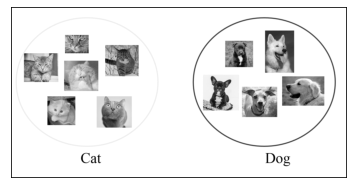

In [10]:
plt.imshow(img[..., 0], cmap='gray')
# remove ticks
plt.xticks([])
plt.yticks([])

In [12]:
img.size

2134016